Linear Regression [Base for all Regression Code]

Regression Equation: y = 184041.30 + 803.89 * x
Accuracy (model.score): 0.005807321409892485
R² Score: 0.005807321409892485
MSE: 12520389553.054056


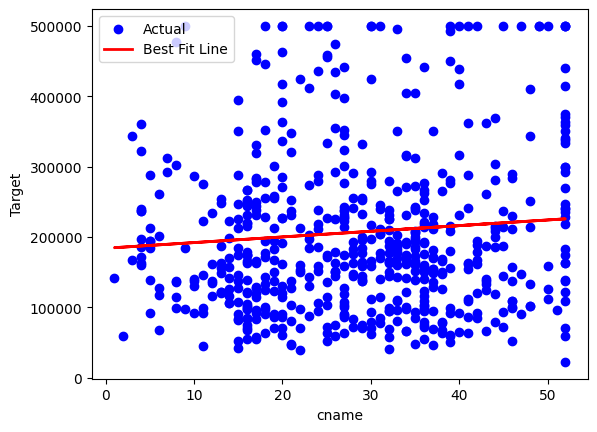

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

X = data[['housing_median_age']]
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#Printing the Model
intercept = model.intercept_
coefficient = model.coef_[0]
print(f"Regression Equation: y = {intercept:.2f} + {coefficient:.2f} * x")

# Accuracy & R²
print("Accuracy (model.score):", model.score(X_test, y_test))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization with best-fit line
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("cname")
plt.ylabel("Target")
plt.legend()
plt.show()


Polynomial

added import


```
from sklearn.preprocessing import PolynomialFeatures
```



added This before test train split

```
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
```

Sorting For smooth visualization


```
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq_poly = poly.transform(X_seq)
y_seq = model.predict(X_seq_poly)
```





Coefficients: [   0.         -496.94452186   22.42057265]
Intercept: 199357.7819551872
Accuracy (model.score): 0.010237350308916593
R² Score: 0.010237350308916593
MSE: 12464599876.92636


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


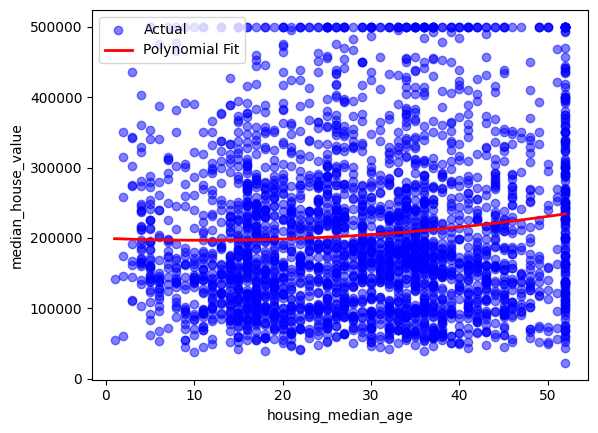

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

X = data[['housing_median_age']]
y = data['median_house_value']

# Polynomial transformation (degree=2 for example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#print The coefs and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Accuracy & R²
print("Accuracy (model.score):", model.score(X_test, y_test))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization (sort X for smooth curve)
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq_poly = poly.transform(X_seq)
y_seq = model.predict(X_seq_poly)

plt.scatter(X, y, color="blue", alpha=0.5, label="Actual")
plt.plot(X_seq, y_seq, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.legend()
plt.show()


Multivariable Linear Regression

import Added Numpy

changed X from 1 variable to 2


```
X = data[['housing_median_age', 'total_rooms']]
```

Visualization  Added lines (Actual Vs Predicted Visualization Only)


```
line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(line, line, color="red", linewidth=2, label="Best Fit Line")
```




Coefficients: [1501.69520152   11.2183234 ]
Intercept: 134558.2459776409
Accuracy (model.score): 0.07051389960453647
R² Score: 0.07051389960453647
MSE: 11705505694.936136


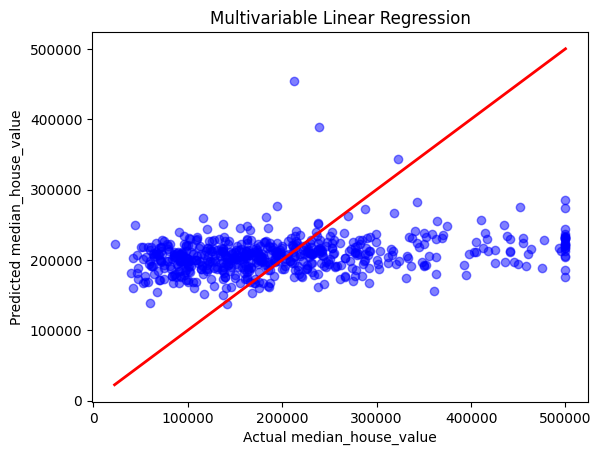

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Use two features instead of one
X = data[['housing_median_age', 'total_rooms']]
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#print The coefs and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Accuracy & R²
print("Accuracy (model.score):", model.score(X_test, y_test))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(line, line, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Multivariable Linear Regression")
plt.show()


Logistic Regression [Base for all Classifiation Code]

Accuracy: 0.6233333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       310
           1       0.61      0.60      0.60       290

    accuracy                           0.62       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.62      0.62      0.62       600


Confusion Matrix:
 [[201 109]
 [117 173]]


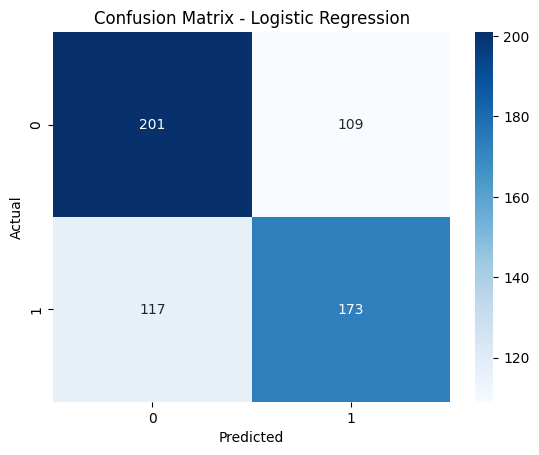

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Features
X = data[['housing_median_age', 'total_rooms']]

# Convert continuous target to binary (1 if above median, else 0)
y = (data['median_house_value'] > data['median_house_value'].median()).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization (confusion matrix heatmap)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Naive Bayes Classifier

Changed The import from Logistic Regression to Gaussian NB


```
from sklearn.naive_bayes import GaussianNB
```

Changed the model to Gaussian NB


```
model = GaussianNB()
```





Accuracy: 0.6166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.86      0.70       310
           1       0.70      0.36      0.47       290

    accuracy                           0.62       600
   macro avg       0.65      0.61      0.59       600
weighted avg       0.64      0.62      0.59       600


Confusion Matrix:
 [[266  44]
 [186 104]]


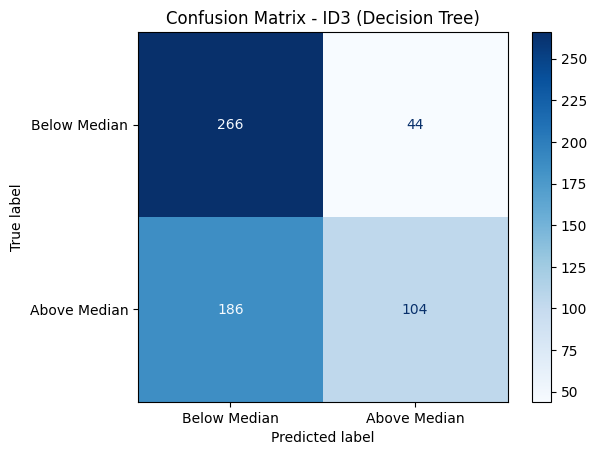

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Features
X = data[['housing_median_age', 'total_rooms']]

# Binary target (1 if above median, else 0)
y = (data['median_house_value'] > data['median_house_value'].median()).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization (confusion matrix ConfusioMatrixDisplay)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=['Below Median','Above Median'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ID3 (Decision Tree)")
plt.show()


ID3

Changed The import to DesicionTreeClassifier


```
from sklearn.tree import DecisionTreeClassifier, plot_tree
```



Changed Model to DecisionTreeClassifier



```
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
```



Added Decision Tree Visualization


```
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['housing_median_age', 'total_rooms'],
          class_names=['Below Median','Above Median'], filled=True)
plt.title("Decision Tree (ID3)")
plt.show()
```



Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.52       310
           1       0.50      0.53      0.52       290

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600


Confusion Matrix:
 [[158 152]
 [136 154]]


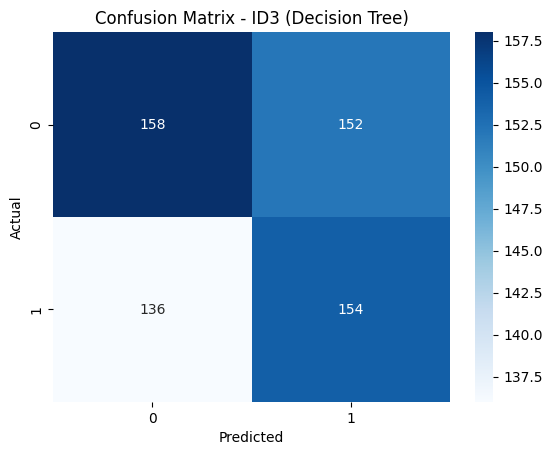

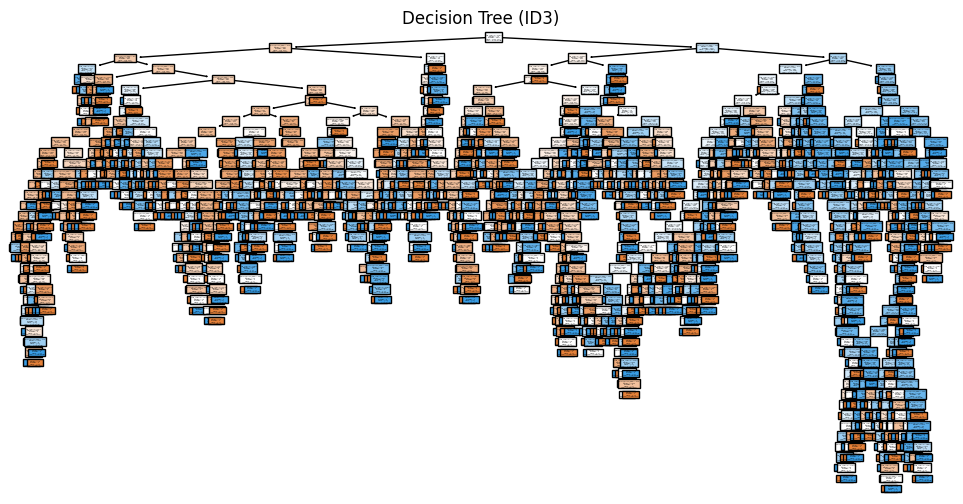

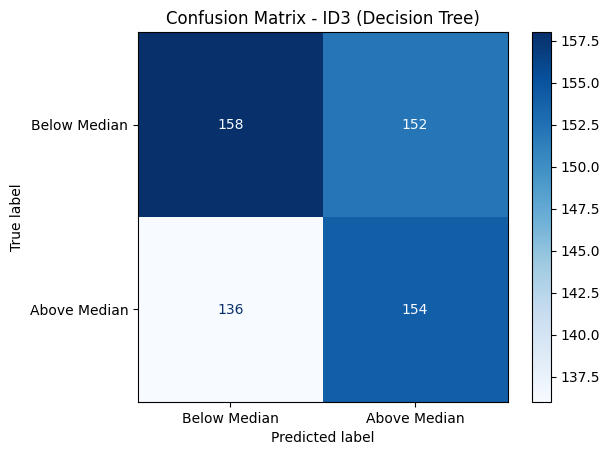

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Features
X = data[['housing_median_age', 'total_rooms']]

# Binary target (1 if above median, else 0)
y = (data['median_house_value'] > data['median_house_value'].median()).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree using entropy (ID3-like)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#------ Optional -----

# Visualization (confusion matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=['Below Median','Above Median'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ID3 (Decision Tree)")
plt.show()



# Visualization (decision tree)
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['housing_median_age', 'total_rooms'],
          class_names=['Below Median','Above Median'], filled=True)
plt.title("Decision Tree (ID3)")
plt.show()
